# 로지스틱 회귀(logistic regression)
- 반응변수(Y)가 범주형인 경우의 회귀분석모형

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

※ 예

- iris data : https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv

In [3]:
### 데이터 불러오기
import pandas as pd
iris = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")

In [4]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [10]:
### 설명변수(x)와 반응변수(y)
x = iris.iloc[50:,3:5] #Petal.Length, Petal.Width 불러옴
y = iris.iloc[50:,5]   # species열 불러옴
y, y_levels = pd.factorize(y)

In [14]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
#train_test_split(설명변수, 반응변수,test_Size = 테스트의 비율설정)

In [15]:
### logistic regression
logistic = LogisticRegression() #로지스틱 분석을 시작하겠다.
model = logistic.fit(x_train,y_train)  #model fitting

In [17]:
### 예측
y_pred = model.predict(x_test) 
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [18]:
### 교차표
pd.crosstab(y_test, y_pred) #y_test가 row_0, y_pred가 col_o

col_0,0,1
row_0,,
0,20,0
1,1,19


In [19]:
### accuracy(전체중에 트루 네거티브 비율)
model.score(x_test,y_test)

0.975

In [21]:
#자동적으로 계산해준다. (시험문제로 딱좋다고 말씀하심)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) #print 무조건 써줘야함

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



### ROC(Receiver Operator Characteristic) 커브

In [22]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

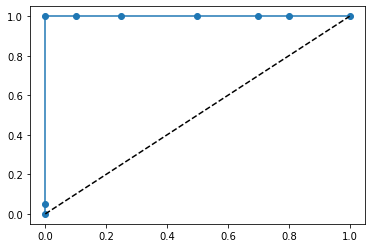

In [24]:
### ROC curve
f_value = model.decision_function(x_test)
p_value = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, p_value)

plt.plot(fpr, tpr, 'o-')
plt.plot([0,1],[0,1],'k--')
plt.show()

※문제

mtcars 자료는 1973~1974년도에 생산된 32 종류의 자동차에 대해 11개의 변수를 측정한 자료이다. 이항 변수 vs(0:flat engine, 1:straight engine)를 반응변수로,
mpg(miles/gallon)와 am(Transmission: 0 = automatic, 1:manual)을 예측변수로 하는 로지스틱 회귀모형을 적합하시오.

- Data file :https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv


In [34]:
### data load
mtcars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv")
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [43]:
### 설명변수(x)와 반응변수(y)
x = mtcars[['mpg','am']] #설명변수 mpg, am
y = mtcars.vs   # 반응변수 vs 

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    1
21    0
22    0
23    0
24    0
25    1
26    0
27    1
28    0
29    0
30    0
31    1
Name: vs, dtype: int64

In [44]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
#train_test_split(설명변수, 반응변수,test_Size = 테스트의 비율설정)

In [45]:
### logistic regression
logistic = LogisticRegression() #로지스틱 분석을 시작하겠다.
model = logistic.fit(x_train,y_train)  #model fitting

In [46]:
### 예측
y_pred = model.predict(x_test) 
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [47]:
### 교차표
pd.crosstab(y_test, y_pred) #y_test가 row_0, y_pred가 col_o

col_0,0,1
vs,,
0,7,0
1,2,4


In [48]:
### accuracy(전체중에 트루 네거티브 비율)
model.score(x_test,y_test)

0.8461538461538461

In [49]:
#자동적으로 계산해준다. (시험문제로 딱좋다고 말씀하심)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) #print 무조건 써줘야함

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.67      0.80         6

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



In [50]:
# ROC 커브
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

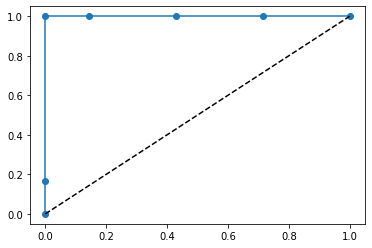

In [51]:
### ROC curve
f_value = model.decision_function(x_test)
p_value = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, p_value)

plt.plot(fpr, tpr, 'o-')
plt.plot([0,1],[0,1],'k--')
plt.show()